<a href="https://colab.research.google.com/github/srikarrb12/Heart-Disease-Detector/blob/main/HeartDiseaseDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import pandas as pd
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

Read CSVs from Github


In [ ]:
urlC = 'https://raw.githubusercontent.com/atjain02/heart-disease-detector/main/Cleveland.csv'
urlH = 'https://raw.githubusercontent.com/atjain02/heart-disease-detector/main/hungarian.csv'
urlS = 'https://raw.githubusercontent.com/atjain02/heart-disease-detector/main/switzerland.csv'
urlV = 'https://raw.githubusercontent.com/atjain02/heart-disease-detector/main/va.csv'

dfC = pd.read_csv(urlC)
dfH = pd.read_csv(urlH)
dfS = pd.read_csv(urlS)
dfV = pd.read_csv(urlV)

Combine datasets

In [ ]:
#all_filenames = [i for i in glob.glob('*.csv')]
#df = pd.concat([pd.read_csv(f) for f in all_filenames])
df = pd.concat([dfC, dfH, dfS, dfV])
df.to_csv("data.csv", index=False)

Visualize null values

In [ ]:
df = pd.read_csv("data.csv", na_values = ["?"])
print(df)
df.isnull().sum()

     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1     67    1   4     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2     67    1   4     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3     37    1   3     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4     41    0   2     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
915   54    0   4     127.0  333.0  1.0      1.0    154.0    0.0      0.0   
916   62    1   1       NaN  139.0  0.0      1.0      NaN    NaN      NaN   
917   55    1   4     122.0  223.0  1.0      1.0    100.0    0.0      0.0   
918   58    1   4       NaN  385.0  1.0      2.0      NaN    NaN      NaN   
919   62    1   2     120.0  254.0  0.0      2.0     93.0    1.0      0.0   

     slope   ca  thal  heart disease  
0      3.0  0.0   6.0              0

age                0
sex                0
cp                 0
trestbps          59
chol              30
fbs               90
restecg            2
thalach           55
exang             55
oldpeak           62
slope            309
ca               611
thal             486
heart disease      0
dtype: int64

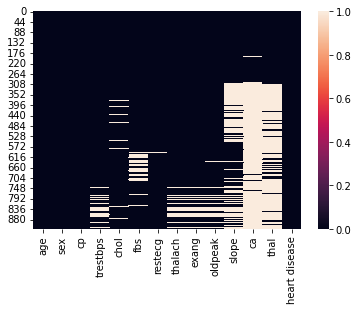

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df = df.drop(columns=['slope', 'ca', 'thal'])


In [ ]:
df = df.dropna()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heart disease
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...
913,62,1,4,158.0,170.0,0.0,1.0,138.0,1.0,0.0,1
914,46,1,4,134.0,310.0,0.0,0.0,126.0,0.0,0.0,1
915,54,0,4,127.0,333.0,1.0,1.0,154.0,0.0,0.0,1
917,55,1,4,122.0,223.0,1.0,1.0,100.0,0.0,0.0,1


In [ ]:
index = [i for i in range(740)]
df.index = index

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heart disease
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...
735,62,1,4,158.0,170.0,0.0,1.0,138.0,1.0,0.0,1
736,46,1,4,134.0,310.0,0.0,0.0,126.0,0.0,0.0,1
737,54,0,4,127.0,333.0,1.0,1.0,154.0,0.0,0.0,1
738,55,1,4,122.0,223.0,1.0,1.0,100.0,0.0,0.0,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heart disease
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,53.097297,0.764865,3.227027,132.754054,220.136486,0.150000,0.635135,138.744595,0.400000,0.894324,0.517568
std,9.408127,0.424370,0.939193,18.581250,93.614555,0.357313,0.840039,25.846082,0.490229,1.087160,0.500029
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000
25%,46.000000,1.000000,2.000000,120.000000,197.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,231.000000,0.000000,0.000000,140.000000,0.000000,0.500000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,271.000000,0.000000,1.000000,159.250000,1.000000,1.500000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [ ]:
df.shape


(740, 11)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heart disease
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'heart disease'],
      dtype='object')

In [ ]:
df.nunique()

age               50
sex                2
cp                 4
trestbps          58
chol             208
fbs                2
restecg            3
thalach          115
exang              2
oldpeak           44
heart disease      2
dtype: int64

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heart disease
age,1.000000,0.032852,0.197042,0.251817,-0.068419,0.223890,0.211845,-0.367020,0.234188,0.251741,0.286994
sex,0.032852,1.000000,0.151092,0.012906,-0.179650,0.072285,-0.024622,-0.168457,0.186028,0.110612,0.300080
cp,0.197042,0.151092,1.000000,0.033367,-0.079015,0.023387,0.053679,-0.361233,0.440264,0.250019,0.464048
trestbps,0.251817,0.012906,0.033367,1.000000,0.060759,0.160054,0.079375,-0.121594,0.180908,0.182027,0.149894
chol,-0.068419,-0.179650,-0.079015,0.060759,1.000000,0.034016,0.085242,0.196281,-0.065146,0.060660,-0.136222
fbs,0.223890,0.072285,0.023387,0.160054,0.034016,1.000000,0.105944,-0.056214,0.043261,0.053402,0.125346
restecg,0.211845,-0.024622,0.053679,0.079375,0.085242,0.105944,1.000000,0.048554,0.039431,0.111673,0.089375
thalach,-0.367020,-0.168457,-0.361233,-0.121594,0.196281,-0.056214,0.048554,1.000000,-0.390388,-0.181867,-0.394231
exang,0.234188,0.186028,0.440264,0.180908,-0.065146,0.043261,0.039431,-0.390388,1.000000,0.409744,0.490201
oldpeak,0.251741,0.110612,0.250019,0.182027,0.060660,0.053402,0.111673,-0.181867,0.409744,1.000000,0.416882


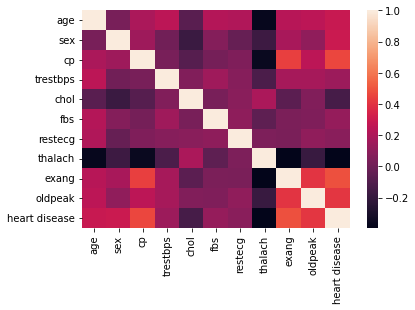

In [ ]:
correlation = df.corr()
sns.heatmap(correlation)
correlation

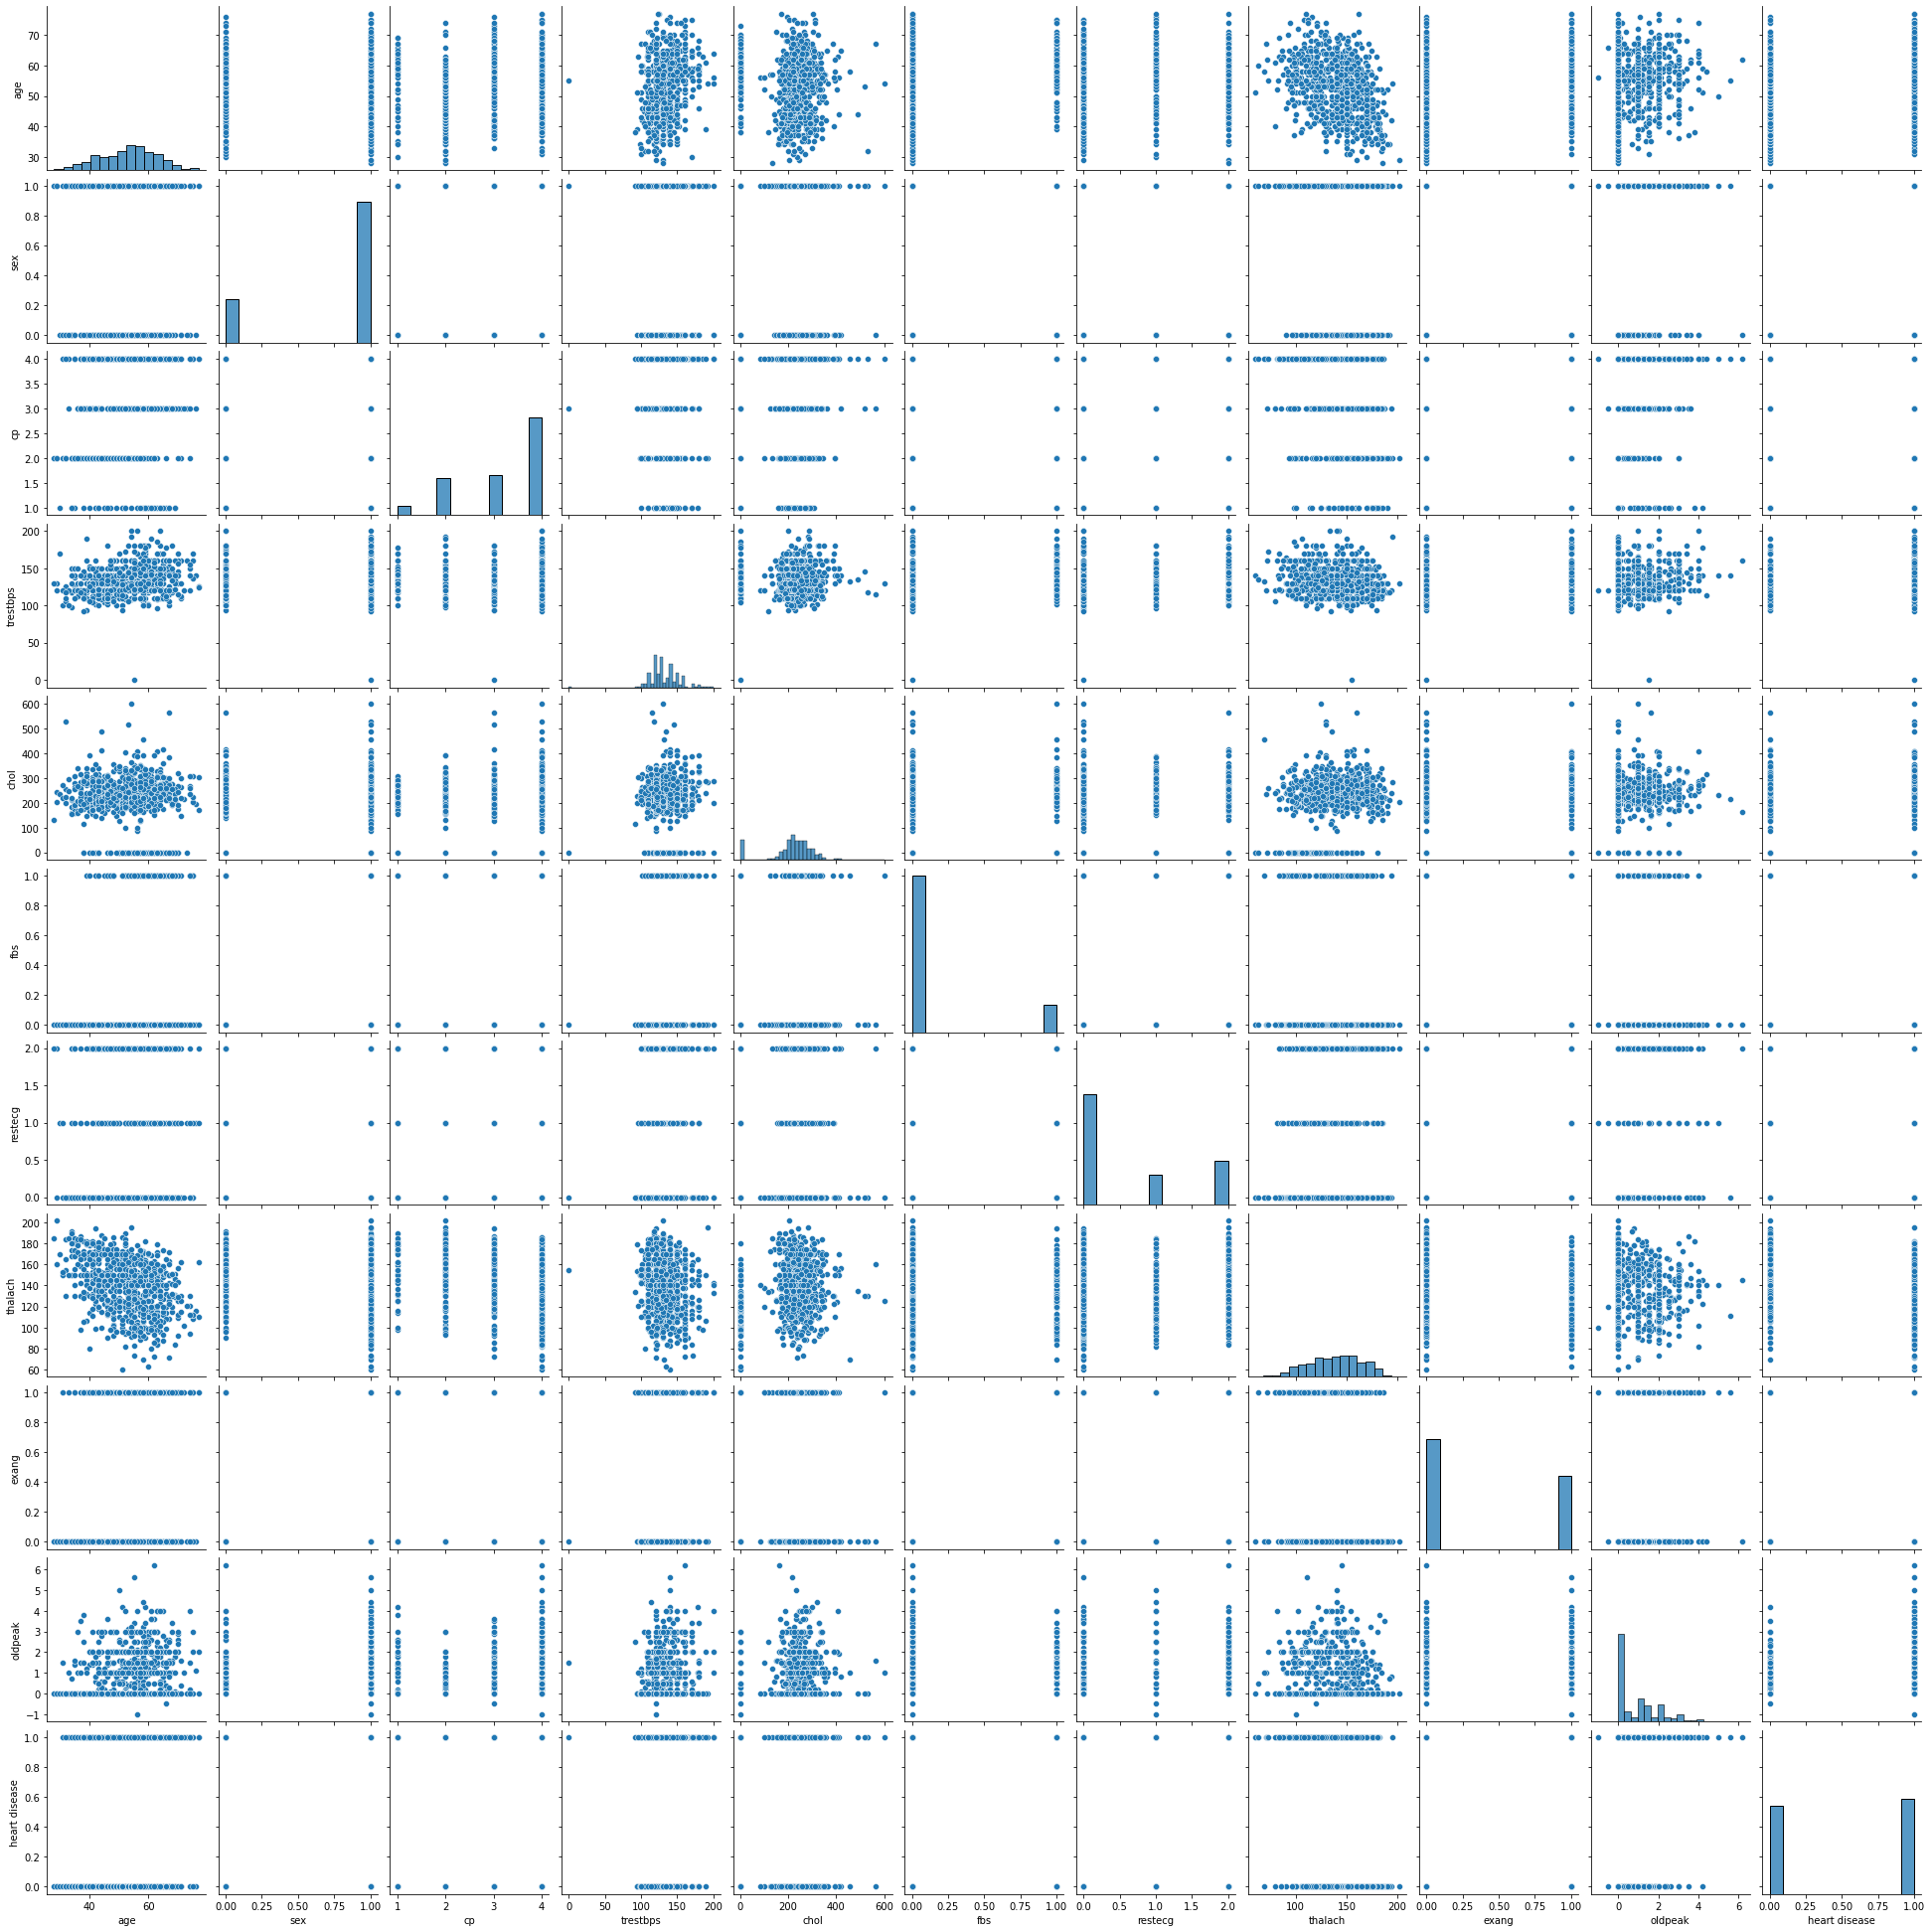

In [ ]:
sns.pairplot(df)

Support Vector Machine 

In [ ]:
# Importing Dependencies
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak']],df['heart disease'],test_size = 0.25)

In [ ]:
# Training the algorithm
svclassifier = SVC(kernel = "linear")
svclassifier.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
#Predicting Classes
y_pred = svclassifier.predict(X_test)
print (y_pred)

[0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0
 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1]


In [ ]:
#Evaluating the model
print(classification_report(y_test,y_pred))
#Add final and testing score

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        89
           1       0.81      0.82      0.81        96

    accuracy                           0.81       185
   macro avg       0.81      0.80      0.80       185
weighted avg       0.81      0.81      0.81       185



Logistic Regression

---



In [ ]:
# Importing Dependencies
from sklearn.linear_model import LogisticRegression

# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak']],df['heart disease'],test_size=0.2)


In [ ]:
# Printing variable
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
124,65,1,1,138.0,282.0,1.0,2.0,174.0,0.0,1.4
614,66,1,3,110.0,213.0,1.0,2.0,99.0,1.0,1.3
592,60,1,4,160.0,0.0,0.0,1.0,99.0,1.0,0.5
88,53,0,4,138.0,234.0,0.0,2.0,160.0,0.0,0.0
582,56,1,3,120.0,0.0,0.0,0.0,97.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
392,49,0,3,130.0,207.0,0.0,1.0,135.0,0.0,0.0
20,64,1,1,110.0,211.0,0.0,2.0,144.0,1.0,1.8
140,59,1,2,140.0,221.0,0.0,0.0,164.0,1.0,0.0
122,51,1,3,100.0,222.0,0.0,0.0,143.0,1.0,1.2


In [ ]:
# Creating the model and training it using the training dataset
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Using testing data set to test model
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
# Checking model's accuracy
model.score(X_test, y_test)

0.7635135135135135

Naive Bayes Algorithm

In [ ]:
# importing required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
# seperate the independent and target variable on training data, don't know how to do this with this data because there are more than 2 columns
#train_x = train_data.drop(columns=[''],axis=1)
#train_y = train_data['COLUMN_1_NAME']

In [ ]:
# seperate the independent and target variable on testing data
#test_x = test_data.drop(columns=['COLUMN_1_NAME'],axis=1)
#test_y = test_data['COLUMN_1_NAME']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak']],df['heart disease'],test_size=0.2)

In [ ]:
#Create the object of the Naive Bayes model
model = GaussianNB()

In [ ]:
# fit the model with the training data
model.fit(train_x,train_y)

GaussianNB()

In [ ]:
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

Target on train data [1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1
 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1
 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0
 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0
 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0

In [ ]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.8141891891891891


In [ ]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0]


In [ ]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8243243243243243


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfs = RandomForestClassifier(n_estimators=250, max_depth=6)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak']],df['heart disease'],test_size=0.2)

In [ ]:
rfs.fit(train_x,train_y)

RandomForestClassifier(max_depth=6, n_estimators=250)

In [ ]:
rfs.predict(test_x)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
rfs.score(X_test,y_test)

0.9054054054054054